In [7]:
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.ibmq import *
from qiskit.providers.ibmq.job import job_monitor
from qiskit.providers.aer import AerSimulator

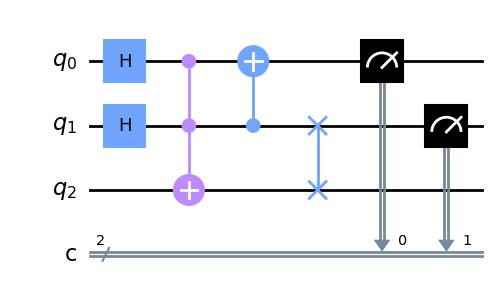

In [8]:
half_adder = QuantumCircuit(3,2)

half_adder.h(0)
half_adder.h(1)
half_adder.ccx(0,1,2)
half_adder.cx(1,0)
half_adder.swap(1,2)
half_adder.measure(range(2),range(2))

half_adder.draw(output='mpl')

입력은 3개 qbit, 출력은 2개 qbit -> 남는 비트를 ancilla비트라고 함

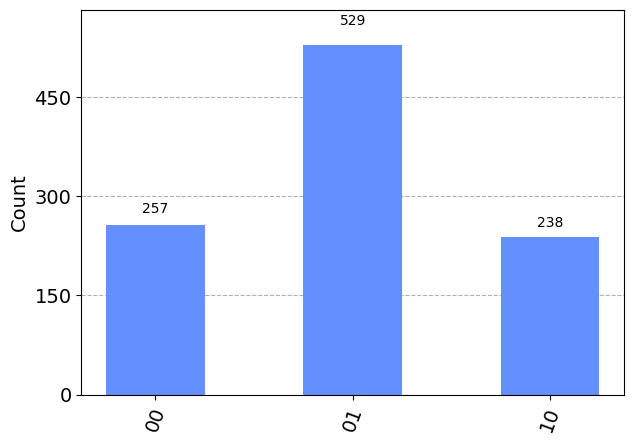

In [9]:
sim = AerSimulator()

job = execute(half_adder,sim,shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
provider = IBMQ.load_account()
print(provider.backends(simulator = False))
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)


dev = least_busy(dev_list)
job = execute(half_adder,dev,shots=1024)
job_monitor(job)

result = job.result()
count_dev = result.get_counts()
plot_histogram(count_dev)

ibmqfactory.load_account:WARNING:2024-01-30 08:07:50,677: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]
Job Status: job has been cancelled                 
Traceback (most recent call last):
  Cell In[10], line 12
    result = job.result()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/job/ibmqjob.py:279 in result
    raise IBMQJobInvalidStateError('Unable to retrieve result for job {}. '
IBMQJobInvalidStateError: 'Unable to retrieve result for job cpwawq20f6rg008x9300. Job was cancelled.'

Use %tb to get the full traceback.
